In [97]:
import math
from matplotlib import pyplot as plt
import random
from tqdm.notebook import tqdm, trange
import time  

In [199]:
raw_data = []
with open('../data/gr.txt') as f:
    header = next(f)
    for line in f:
        values = line[:-1].split('\t')
        raw_data.append((
            float(values[1]) - float(values[2]) + random.uniform(-1,1) * 0.02, 
            float(values[1]) + 5.0 + 5.0 * math.log10(float(values[3]) / 1000.0) + random.uniform(-1,1) * 0.3
        ))

In [200]:
len(raw_data)

39235

In [201]:
x_scale = max([i[0] for i in raw_data]) - min([i[0] for i in raw_data])
y_scale = max([i[1] for i in raw_data]) - min([i[1] for i in raw_data])

In [202]:
def dist(x: float, y: float) -> float:
    return math.sqrt((x / x_scale)**2 + (y / y_scale)**2)

data = []
TRASHHOLD=0.004

raw_data.sort(key=lambda x: x[0])

for rd in tqdm(raw_data):
    is_redundant = False
    for i in range(len(data)):
        d = data[len(data) - 1 - i]
        if (rd[0] - d[0]) / x_scale > TRASHHOLD:
            break
        if dist(rd[0] - d[0], rd[1] - d[1]) < TRASHHOLD:
            is_redundant = True
            break
    if not is_redundant:
        data.append(rd)

In [203]:
len(data)

6475

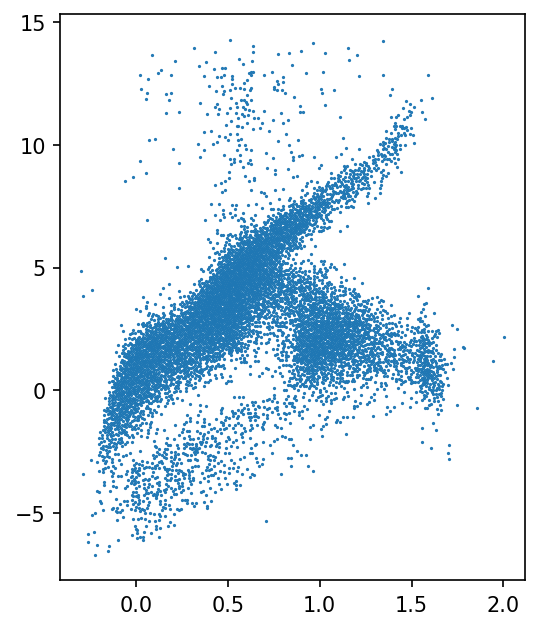

In [206]:
plt.figure(figsize=(4,5),dpi=150)
plt.scatter([i[0] for i in data[:]], [i[1] for i in data[:]], s=0.3)
plt.show()

In [207]:
with open('../data/gr-plot.txt', 'w') as f:
    f.write('BV\tM\n')
    for d in data[:6500]:
        f.write('{:.3f}'.format(d[0]) + '\t' + '{:.3f}'.format(d[1]) + '\n')